#### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">AllLife Bank Customer Segmentation
##### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Project 6

### by Anthony Amabile
AllLife bank wants to focus on their credit card customers and wants to improve market penetration for thier credit card products. The marketing team wants to run personalized campagins for these customers to both target new customers as well as upsell existing customers. In addition, the bank wants to improve it's service of these customers.

This project undertakes the opportunity to:  

1. Identify the different customer segments using clustering algorithms 
2. Provide reccomendations to AllLife on how to better market to and service these customers


In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# to perform PCA
from sklearn.decomposition import PCA


# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

<IPython.core.display.Javascript object>

In [3]:
import os
os.chdir('/Users/Tony/Documents/Texas Austin AI ML/Unsuperised Learning/Project 6')
os.getcwd()

'c:\\Users\\Tony\\Documents\\Texas Austin AI ML\\Unsuperised Learning\\Project 6'

<IPython.core.display.Javascript object>

In [4]:
data = pd.read_excel('Credit+Card+Customer+Data.xlsx')
df = data.copy()
df.sample(10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


<IPython.core.display.Javascript object>

In [5]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the original dataset.')

There are 660 rows and 7 columns in the original dataset.


<IPython.core.display.Javascript object>

In [6]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

In [8]:
# checking for duplicate values
dup_data = df.duplicated().sum()

print(f'There is {dup_data} duplicate data.')

There is 0 duplicate data.


<IPython.core.display.Javascript object>

There are no duplicate values. There are no null values. All the values are formatted as integers.

The data appears to be pretty clean to start.

In [9]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<IPython.core.display.Javascript object>

There are 655 customers in our data set but there are 660 entries in the data set. It appears 5 customers have two entries.

In [10]:
df.loc[df.duplicated(subset='Customer Key'), :]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

In [11]:
df.loc[df['Customer Key'].isin([47437,96929,37252,50706,97935]), :].sort_values(by=['Customer Key'], ascending=True)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

These duplicate customer entries will be dropped.

In [12]:
df.drop(df.loc[df['Customer Key'].isin([47437,96929,37252,50706,97935]), :].index, inplace=True) 

<IPython.core.display.Javascript object>

In [13]:
df.nunique()

Sl_No                  650
Customer Key           650
Avg_Credit_Limit       109
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<IPython.core.display.Javascript object>

In [14]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,330.503077,54973.592308,34229.230769,4.696923,2.403077,2.601538,3.593846
std,190.530985,25585.543007,37260.934830,2.173979,1.627193,2.924789,2.857902
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,166.250000,33391.000000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,328.500000,53907.000000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.750000,77008.750000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


<IPython.core.display.Javascript object>

Observations
1. There are 650 customers in our data set.
2. The median average credit limit for customers in the data set is $18,000.
3. The typical customer has 5 total credit cards.
4. The typical customer makes 2 visits to the bank in a year.
5. The typical customer makes 2 online logins/visits to the bank in a year.
6. The typical customer contacts the bank 3 times by phone in a year.

### EDA

### Univariate analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on Average Credit Limit

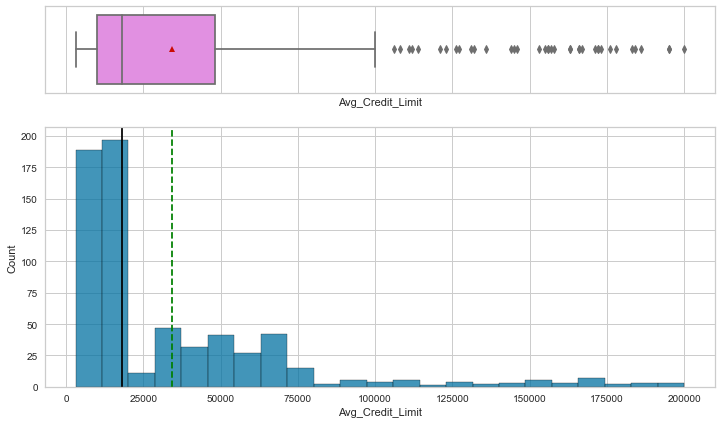

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "Avg_Credit_Limit")

* The distribution of the Average Credit LImit is right skewed.
* The boxplot shows that there are many outliers to the right for this variable.
* From the boxplot, we can see that the third quartile (Q3) is approximately equal to $49,000 which means 75% of customers have an average credit limit less than $49,000.

### Observations on Total Credit Cards

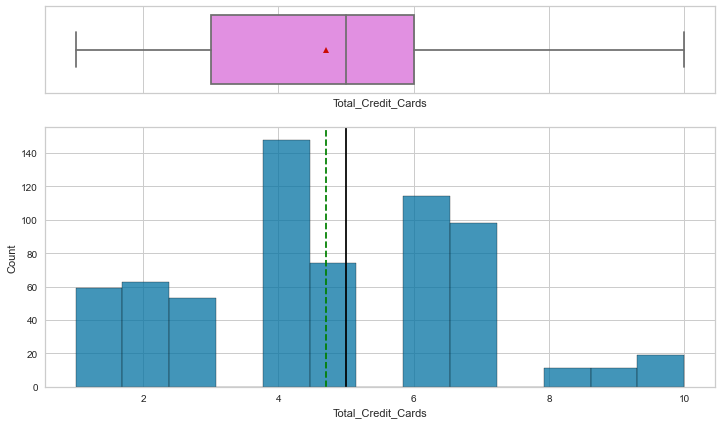

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "Total_Credit_Cards")

* The distribution of Total Credit Cards is fairly normal.
* The boxplot shows that there are no outliers.
* From the boxplot, we can see that the third quartile (Q3) is equal to 6 which means 75% of customers have less than 6 credit cards.

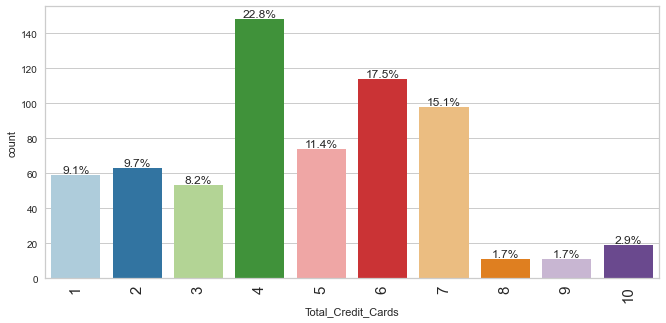

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(df, "Total_Credit_Cards", perc=True)

* Most customers have at least 4 credit cards.

### Observations on Total Visits to Bank

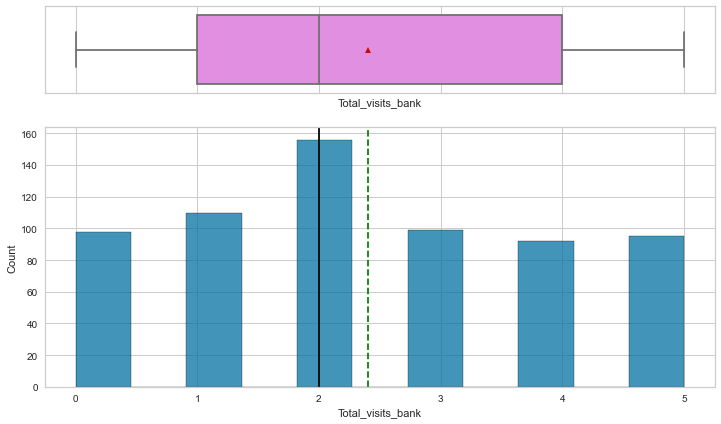

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "Total_visits_bank")

* The distribution of the total visits to the bank is fairly normal.
* The boxplot shows that there are no outliers.
* From the boxplot, we can see that the third quartile (Q3) is equal to 4 which means 75% of customers visits the bank 4 times or less in a year.

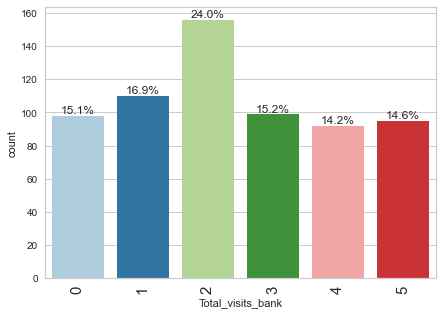

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(df, "Total_visits_bank", perc=True)

* The majority of customers only visit the bank twice or less in a year.

### Observations on Total Visits Online

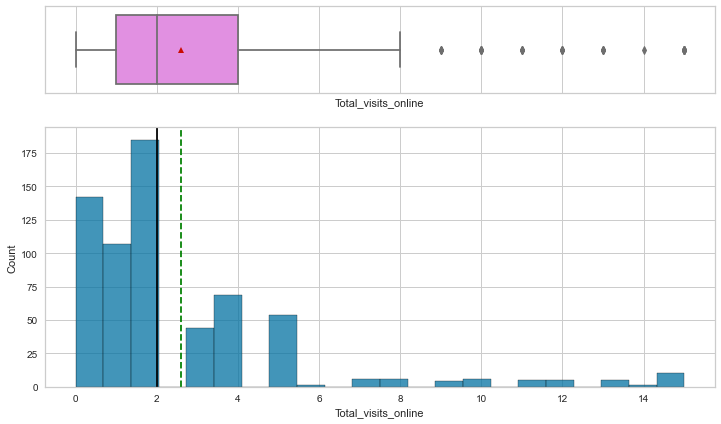

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "Total_visits_online")

* The distribution of Total Visits Online is slightly right skewed.
* The boxplot shows that there are a few outliers to the right.
* From the boxplot, we can see that the third quartile (Q3) is equal to 4 which means 75% of customers have less than 4 total visits online in a year with an average of 2.

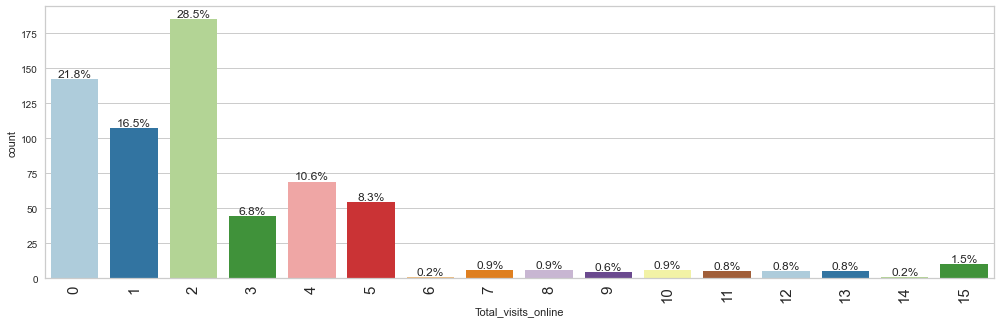

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "Total_visits_online", perc=True)

* Similarly, the majority of customers only visit the bank online twice or less in a year. There are a small amount of users who visit the bank online 5 or more times in a year, with the most visits for a customer in a year at 15.

### Observations on Total Calls Made

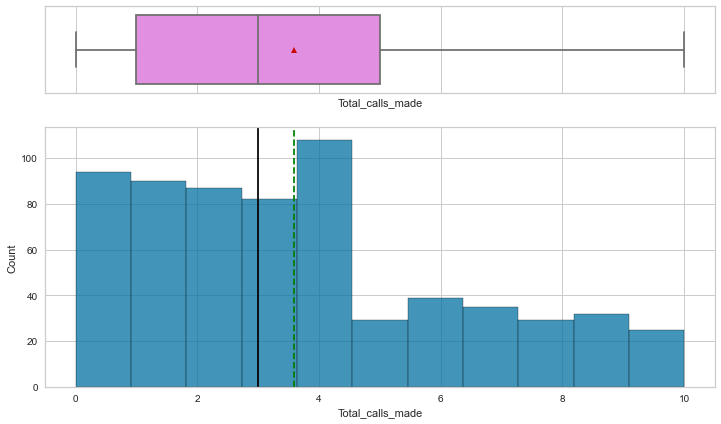

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "Total_calls_made")

* The distribution of total calls made is fairly normal.
* The boxplot shows that there are a no outliers.
* From the boxplot, we can see that the third quartile (Q3) is equal to 5 which means 75% of customers have less than 5 calls to the bank in a year.

Variables with a right skew include: average credit limit and total visits online. The remaining variables have a relatively normal distribution.

In [25]:
cluster_cols = [
    "Avg_Credit_Limit",
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made"
]

<IPython.core.display.Javascript object>

### Bivariate Analysis

Checking for correlations

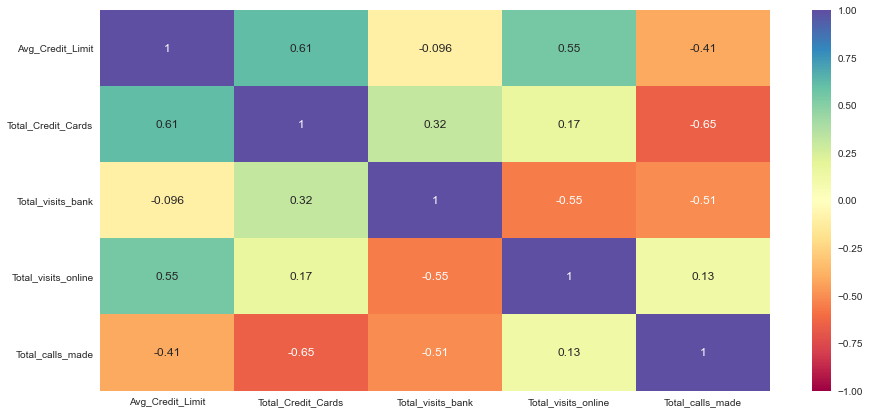

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(df[cluster_cols].corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

**Observations:**
* Total credit cards is negatively correlated with total calls made.
* Average credit limit is positively correlated with total credit cards. This makes sense as your credit score and therefore your credit limit will be impact by how many credit cards a customer has.
* Total visits online (in a year) is negatively correlated with total visits to the bank (in a year). The les
* Similarly, total visits to the bank are negatively correlated with total calls made. The less a customer calls the bank, the more they have to go to visit the bank and vice versa.
* Total visits online is positively correlated with average credit limit.



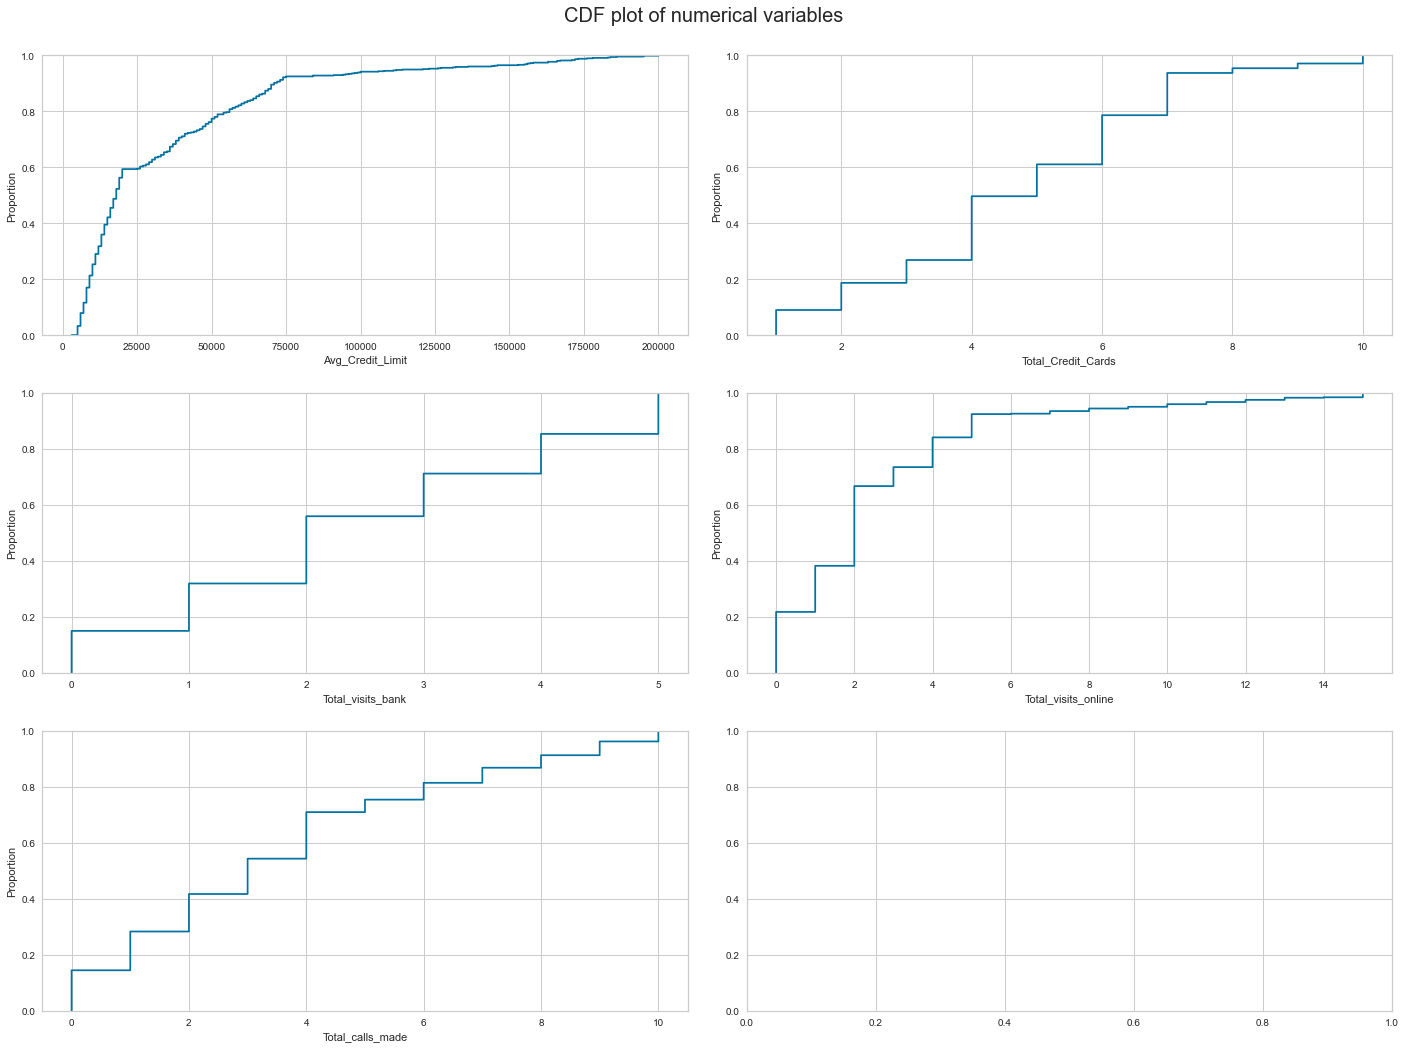

<IPython.core.display.Javascript object>

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[cluster_cols[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[cluster_cols[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

* 90% of customers have have an average credit limit less than $75,000.
* 80% of customers have a less than 6 total credit cards.
* 80% of customers visit a physical bank less than 4 times in a year.
* 95% of customers visit the bank online less than 6 times in a year.
* 80% of customers contact the bank by phone less than 6 times in a year.

**Data Preprocessing**

In [28]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[cluster_cols].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [29]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.005363399425087
Number of Clusters: 2 	Average Distortion: 1.4536709139566302
Number of Clusters: 3 	Average Distortion: 1.1459558163296042
Number of Clusters: 4 	Average Distortion: 1.046526370771242
Number of Clusters: 5 	Average Distortion: 0.990727085679412
Number of Clusters: 6 	Average Distortion: 0.9421765114150914
Number of Clusters: 7 	Average Distortion: 0.9091966469360311
Number of Clusters: 8 	Average Distortion: 0.8890254715318464


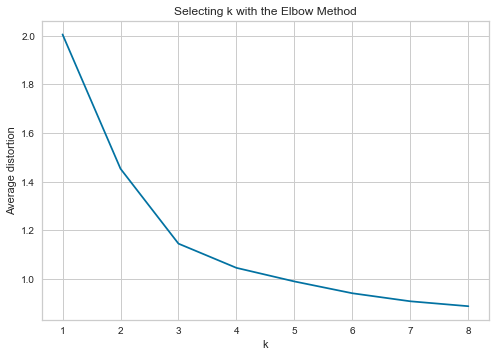

<IPython.core.display.Javascript object>

In [30]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

**Appropriate value for k seems to be 3 or 4.**

Silhouette Scores

Creating Dummy variables

For n_clusters = 2, the silhouette score is 0.41929075804781274)
For n_clusters = 3, the silhouette score is 0.5153584616976485)
For n_clusters = 4, the silhouette score is 0.3548358237914311)
For n_clusters = 5, the silhouette score is 0.2703661765338009)
For n_clusters = 6, the silhouette score is 0.25549648402010067)
For n_clusters = 7, the silhouette score is 0.24783871199997937)
For n_clusters = 8, the silhouette score is 0.22776988525376834)
For n_clusters = 9, the silhouette score is 0.21898739569219836)


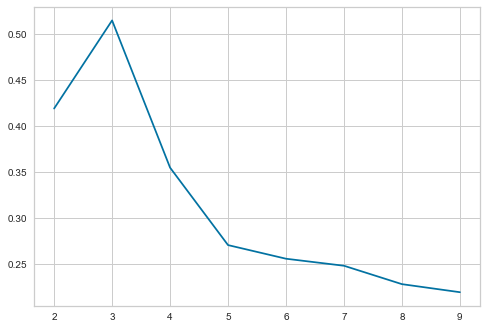

<IPython.core.display.Javascript object>

In [31]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Silhouette score for 3 is higher than that for 4. So, we will choose 3 as value of k.**

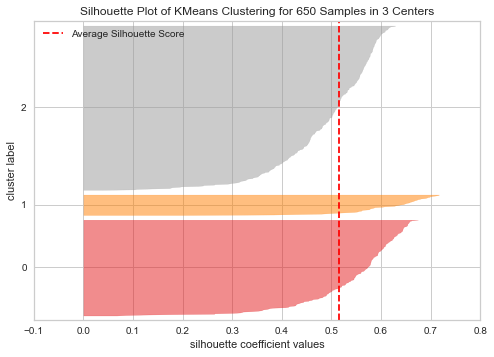

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 650 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [32]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

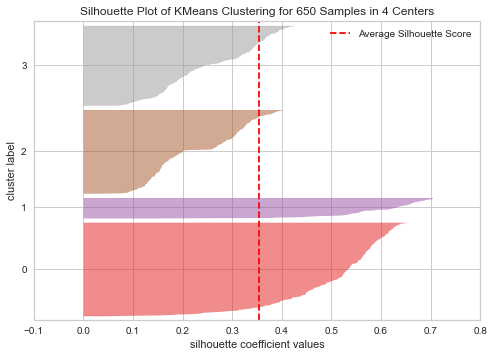

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 650 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [33]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [34]:
# 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

<IPython.core.display.Javascript object>

In [35]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [36]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,2
3,4,40496,30000,5,1,1,4,2
5,6,58634,20000,3,0,1,8,1


<IPython.core.display.Javascript object>

Cluster Profiling: Average Credit Limit

In [37]:
cluster_profile = df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [38]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [110]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="blue", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,
0,417.513158,54747.984211,33631.578947,5.513158,3.486842,0.981579,2.010526,2.000000,380
1,623.458333,56043.041667,140937.500000,8.833333,0.604167,10.958333,1.062500,0.000000,48
2,118.225225,55128.536036,12180.180180,2.405405,0.936937,3.567568,6.851351,1.000000,222


<IPython.core.display.Javascript object>

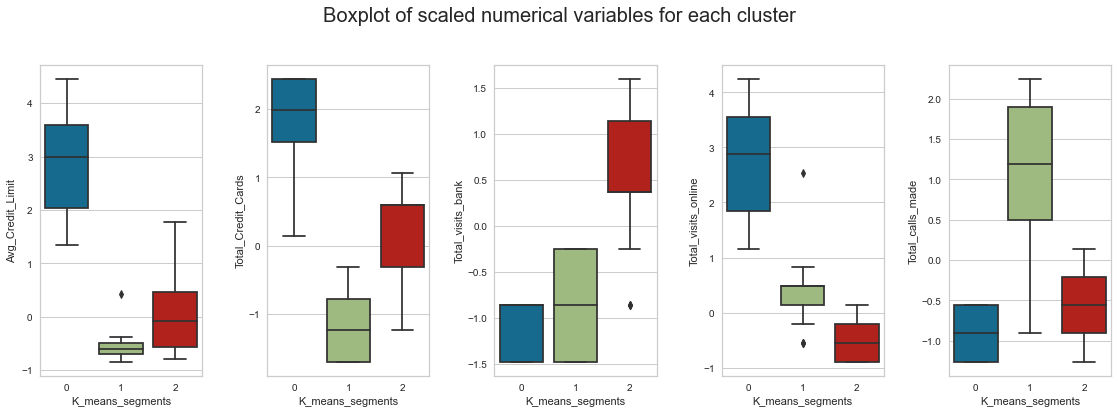

<IPython.core.display.Javascript object>

In [40]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[cluster_cols[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

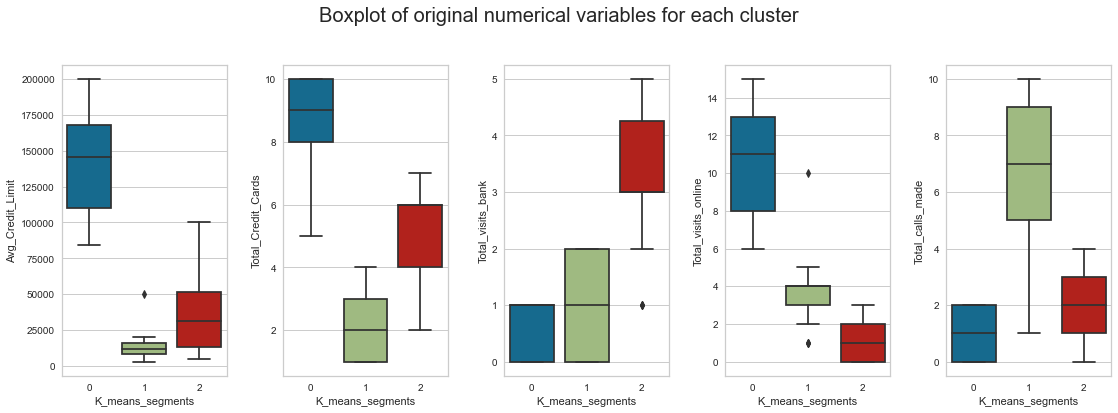

<IPython.core.display.Javascript object>

In [41]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[cluster_cols[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Insights

- **Cluster 0**:
    - This cluster contains 48 customers that have lower average credit limits, with an average average credit limit of $12,180. 
    - Customers in this cluster have an average of 2 credit cards.
    - Customers in this cluser visit the bank in person an average of once a year.
    - Customers in this cluser visit the bank online between 3-4 times in a year.
    - Customers in this segment contact the bank by phone the most with an average of 7 calls in a year.
   
- **Cluster 1**:
    - This cluster contains 222 customers that have the highest average credit limit, with an average average credit limit of $140,938. 
    - Customers in this cluster have an average of 9 credit cards.
    - Customers in this cluser visit the bank in person once a year at most.
    - Customers in this cluser visit the bank online the most with an average of 11 times in a year.
    - Customers in this segment contact the bank by phone the least with an average of one call in a year.
    
- **Cluster 2**:
    - This cluster contains 380 customers that have a moderate average credit limits, with an average average credit limit of $33,631. 
    - Customers in this cluster have an average of 6 credit cards.
    - Customers in this cluser visit the bank in person the most with an average between 3 and 4 times in a year.
    - Customers in this cluser visit the bank online the least, around one visit in a year.
    - Customers in this segment contact the bank by phone the with an average of 2 calls in a year.

### Hierarchical Clustering

Average Linkage Method

In [42]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8792156996515501.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8858330565706428.
Cophenetic correlation for Euclidean distance and average linkage is 0.916656961010491.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9115842542260667.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8972289272665296.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8374865695225165.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9157794458460282.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.88286969192385.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8958149413842564.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6320258433279825.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8458792484359005.
Cophenetic corre

<IPython.core.display.Javascript object>

In [43]:

print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.916656961010491, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

Exploring different linkage methods for Euclidean distance only.

In [44]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8792156996515501.
Cophenetic correlation for complete linkage is 0.8858330565706428.
Cophenetic correlation for average linkage is 0.916656961010491.
Cophenetic correlation for centroid linkage is 0.9133138351581345.
Cophenetic correlation for ward linkage is 0.770584007910175.
Cophenetic correlation for weighted linkage is 0.9115842542260667.


<IPython.core.display.Javascript object>

In [45]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.916656961010491, which is obtained with average linkage.


<IPython.core.display.Javascript object>

This confirms that average linkage is the best linkage method because it has the highest cophenetic correlation.

### Dendograms or each linkage method

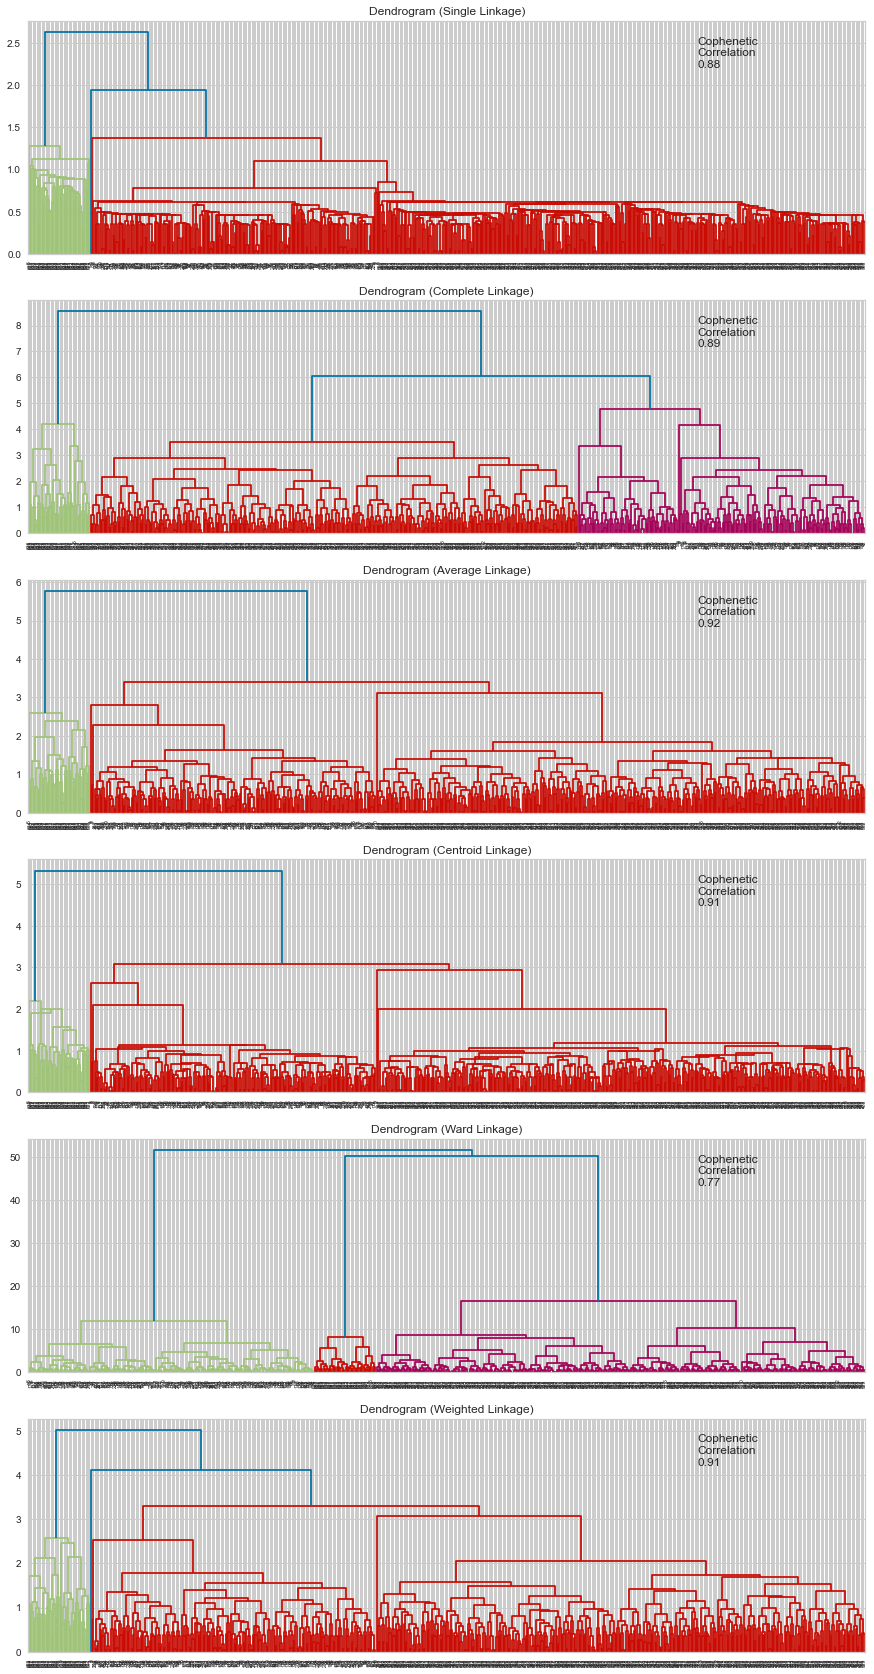

<IPython.core.display.Javascript object>

In [46]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [67]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

<IPython.core.display.Javascript object>

In [68]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [89]:
cluster_profile = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [90]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [91]:
# let's see the customers in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following customers are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Customer Key"].unique())
    print()

In cluster 0, the following customers are present:
[87073 17341 40496 54838 35254 46635 97825 83125 35483 15129 83290 56486
 31903 45909 14263 46813 81878 35549 85799 39122 81531 69965 18595 44398
 32352 40898 27101 33457 45088 23302 27408 65372 21531 56843 17165 89328
 20072 71402 47496 24808 17036 67193 34423 97109 55382 51811 53936 66504
 53207 18514 51319 36340 36934 95925 49771 22919 21233 74544 52025 45652
 73952 49418 77026 49331 75775 54906 94666 11698 34677 95610 41380 38033
 85337 38994 67911 92956 77641 57565 53814 30712 19785 31384 16374 50878
 78002 83459 91987 51552 24998 45673 11596 87485 28414 81863 33240 11466
 23881 44645 49844 92782 22824 26767 26678 50412 17933 34495 22610 41159
 64672 62483 85614 96548 19137 69028 70779 38244 67046 64897 46223 36628
 17565 77381 11799 81940 66706 87838 94437 33790 44402 29886 66804 47866
 61996 15318 89635 71681 71862 96186 22348 36243 88807 82376 98126 80347
 17649 62807 92522 57459 44579 45476 61994 11398 24702 27824 45878 72431


<IPython.core.display.Javascript object>

We see that there is 1 cluster of 48 countries, and all the other countries are grouped into the other two clusters. This clustering looks like it's pretty good but we will still see if it could be improved.

Complete linkage will be attempted as it has more distinct and separated clusters (as seen from it's dendrogram before). 3 also appears to be the appropriate number of clusters from the dendrogram for Complete linkage.

In [84]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

<IPython.core.display.Javascript object>

In [85]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [86]:
cluster_profile = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [87]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [92]:
# let's see the customers in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following customers are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Customer Key"].unique())
    print()

In cluster 0, the following customers are present:
[87073 17341 40496 54838 35254 46635 97825 83125 35483 15129 83290 56486
 31903 45909 14263 46813 81878 35549 85799 39122 81531 69965 18595 44398
 32352 40898 27101 33457 45088 23302 27408 65372 21531 56843 17165 89328
 20072 71402 47496 24808 17036 67193 34423 97109 55382 51811 53936 66504
 53207 18514 51319 36340 36934 95925 49771 22919 21233 74544 52025 45652
 73952 49418 77026 49331 75775 54906 94666 11698 34677 95610 41380 38033
 85337 38994 67911 92956 77641 57565 53814 30712 19785 31384 16374 50878
 78002 83459 91987 51552 24998 45673 11596 87485 28414 81863 33240 11466
 23881 44645 49844 92782 22824 26767 26678 50412 17933 34495 22610 41159
 64672 62483 85614 96548 19137 69028 70779 38244 67046 64897 46223 36628
 17565 77381 11799 81940 66706 87838 94437 33790 44402 29886 66804 47866
 61996 15318 89635 71681 71862 96186 22348 36243 88807 82376 98126 80347
 17649 62807 92522 57459 44579 45476 61994 11398 24702 27824 45878 72431


<IPython.core.display.Javascript object>

The clusters seem to be exactly the same as our complete linkage clustering model.

In [93]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="blue", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,
0,417.513158,54747.984211,33631.578947,5.513158,3.486842,0.981579,2.010526,2.000000,380
1,623.458333,56043.041667,140937.500000,8.833333,0.604167,10.958333,1.062500,0.000000,48
2,118.225225,55128.536036,12180.180180,2.405405,0.936937,3.567568,6.851351,1.000000,222


<IPython.core.display.Javascript object>

IndexError: list index out of range

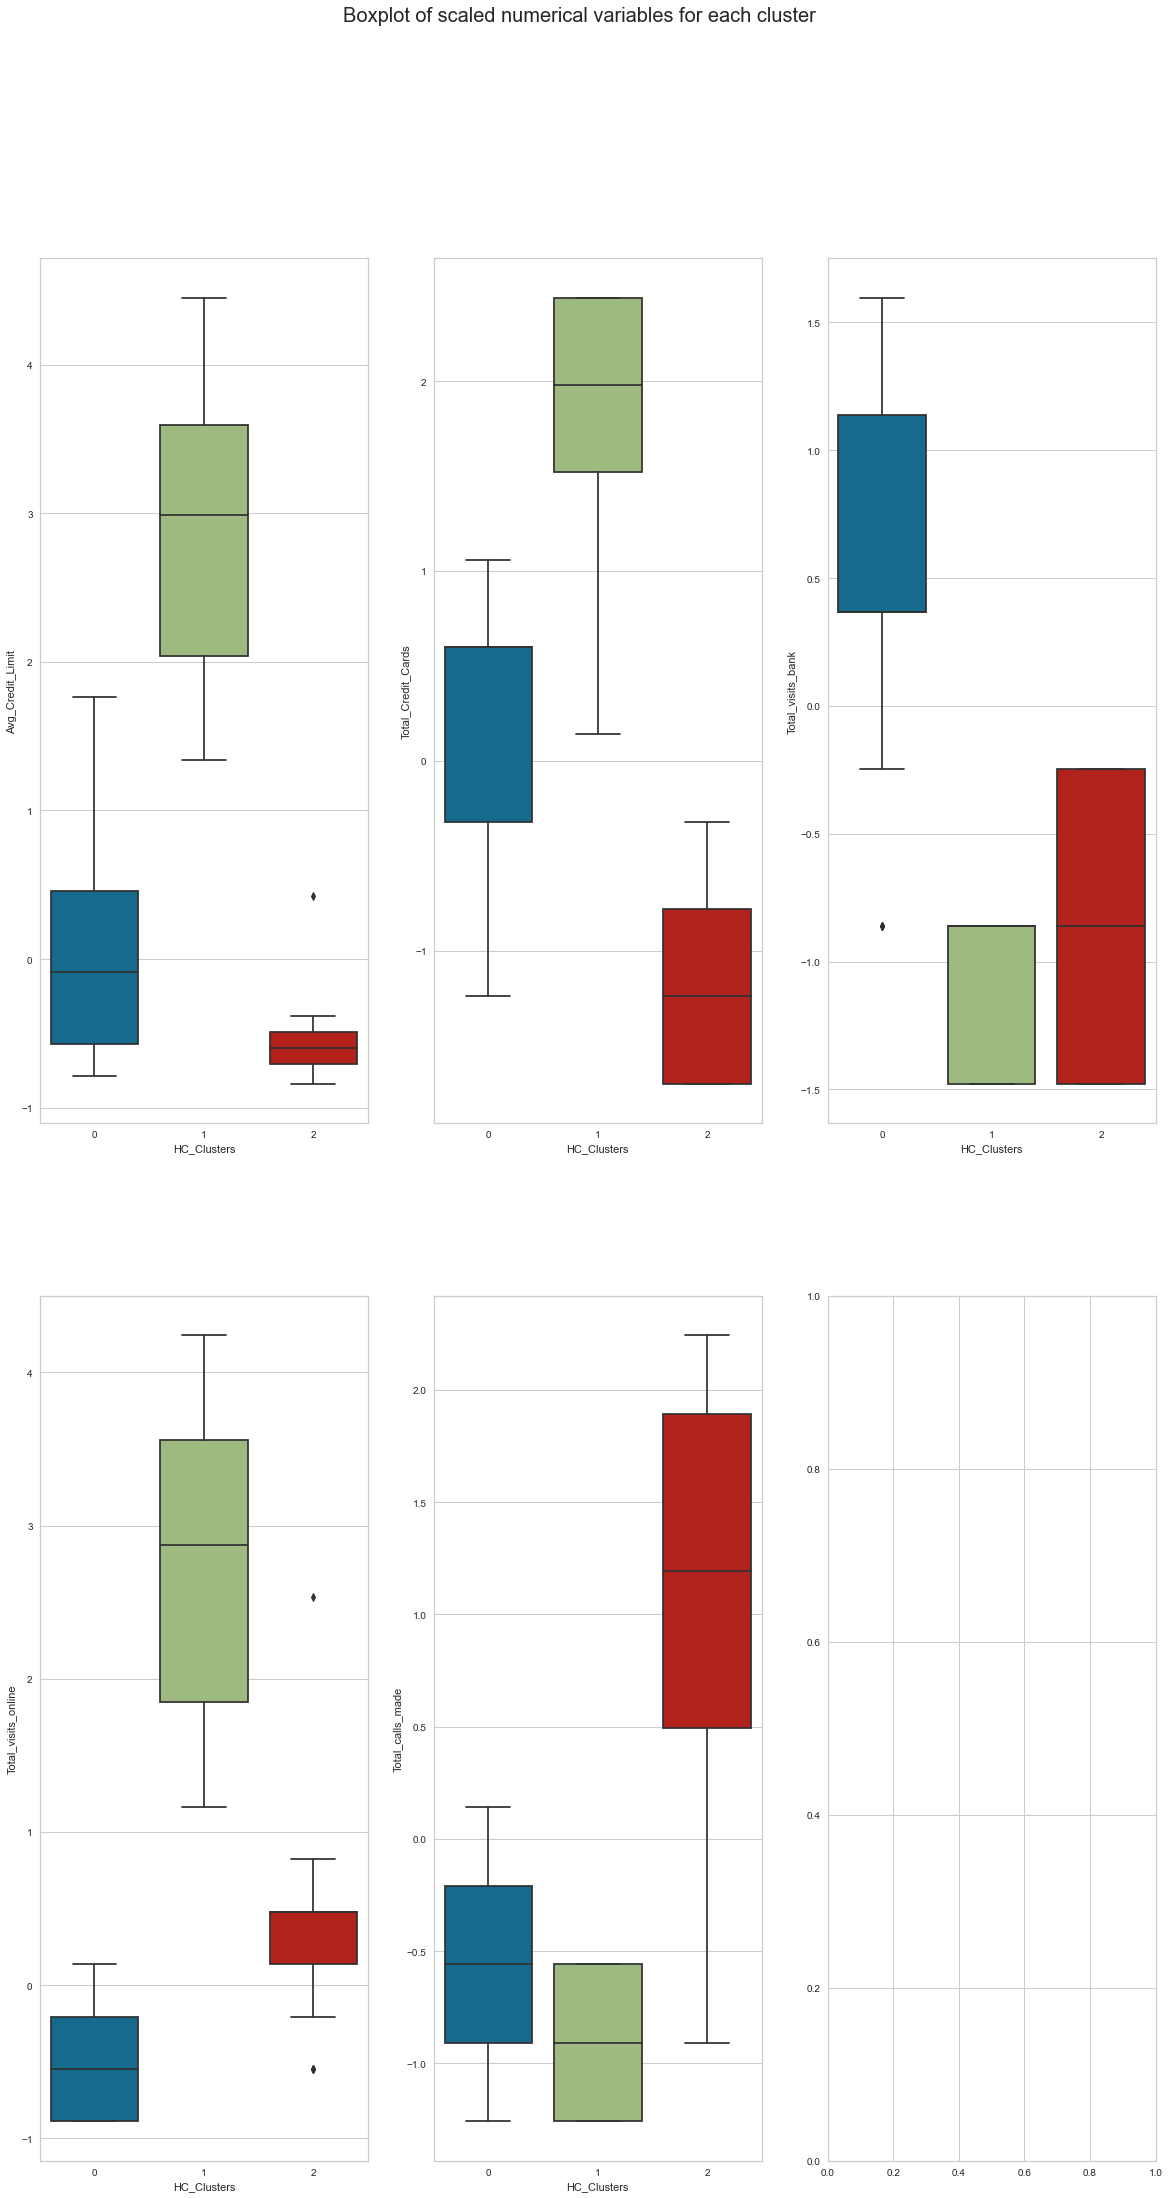

<IPython.core.display.Javascript object>

In [96]:
fig, axes = plt.subplots(2, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_df[cluster_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=subset_scaled_df[cluster_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=subset_scaled_df[cluster_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)

IndexError: list index out of range

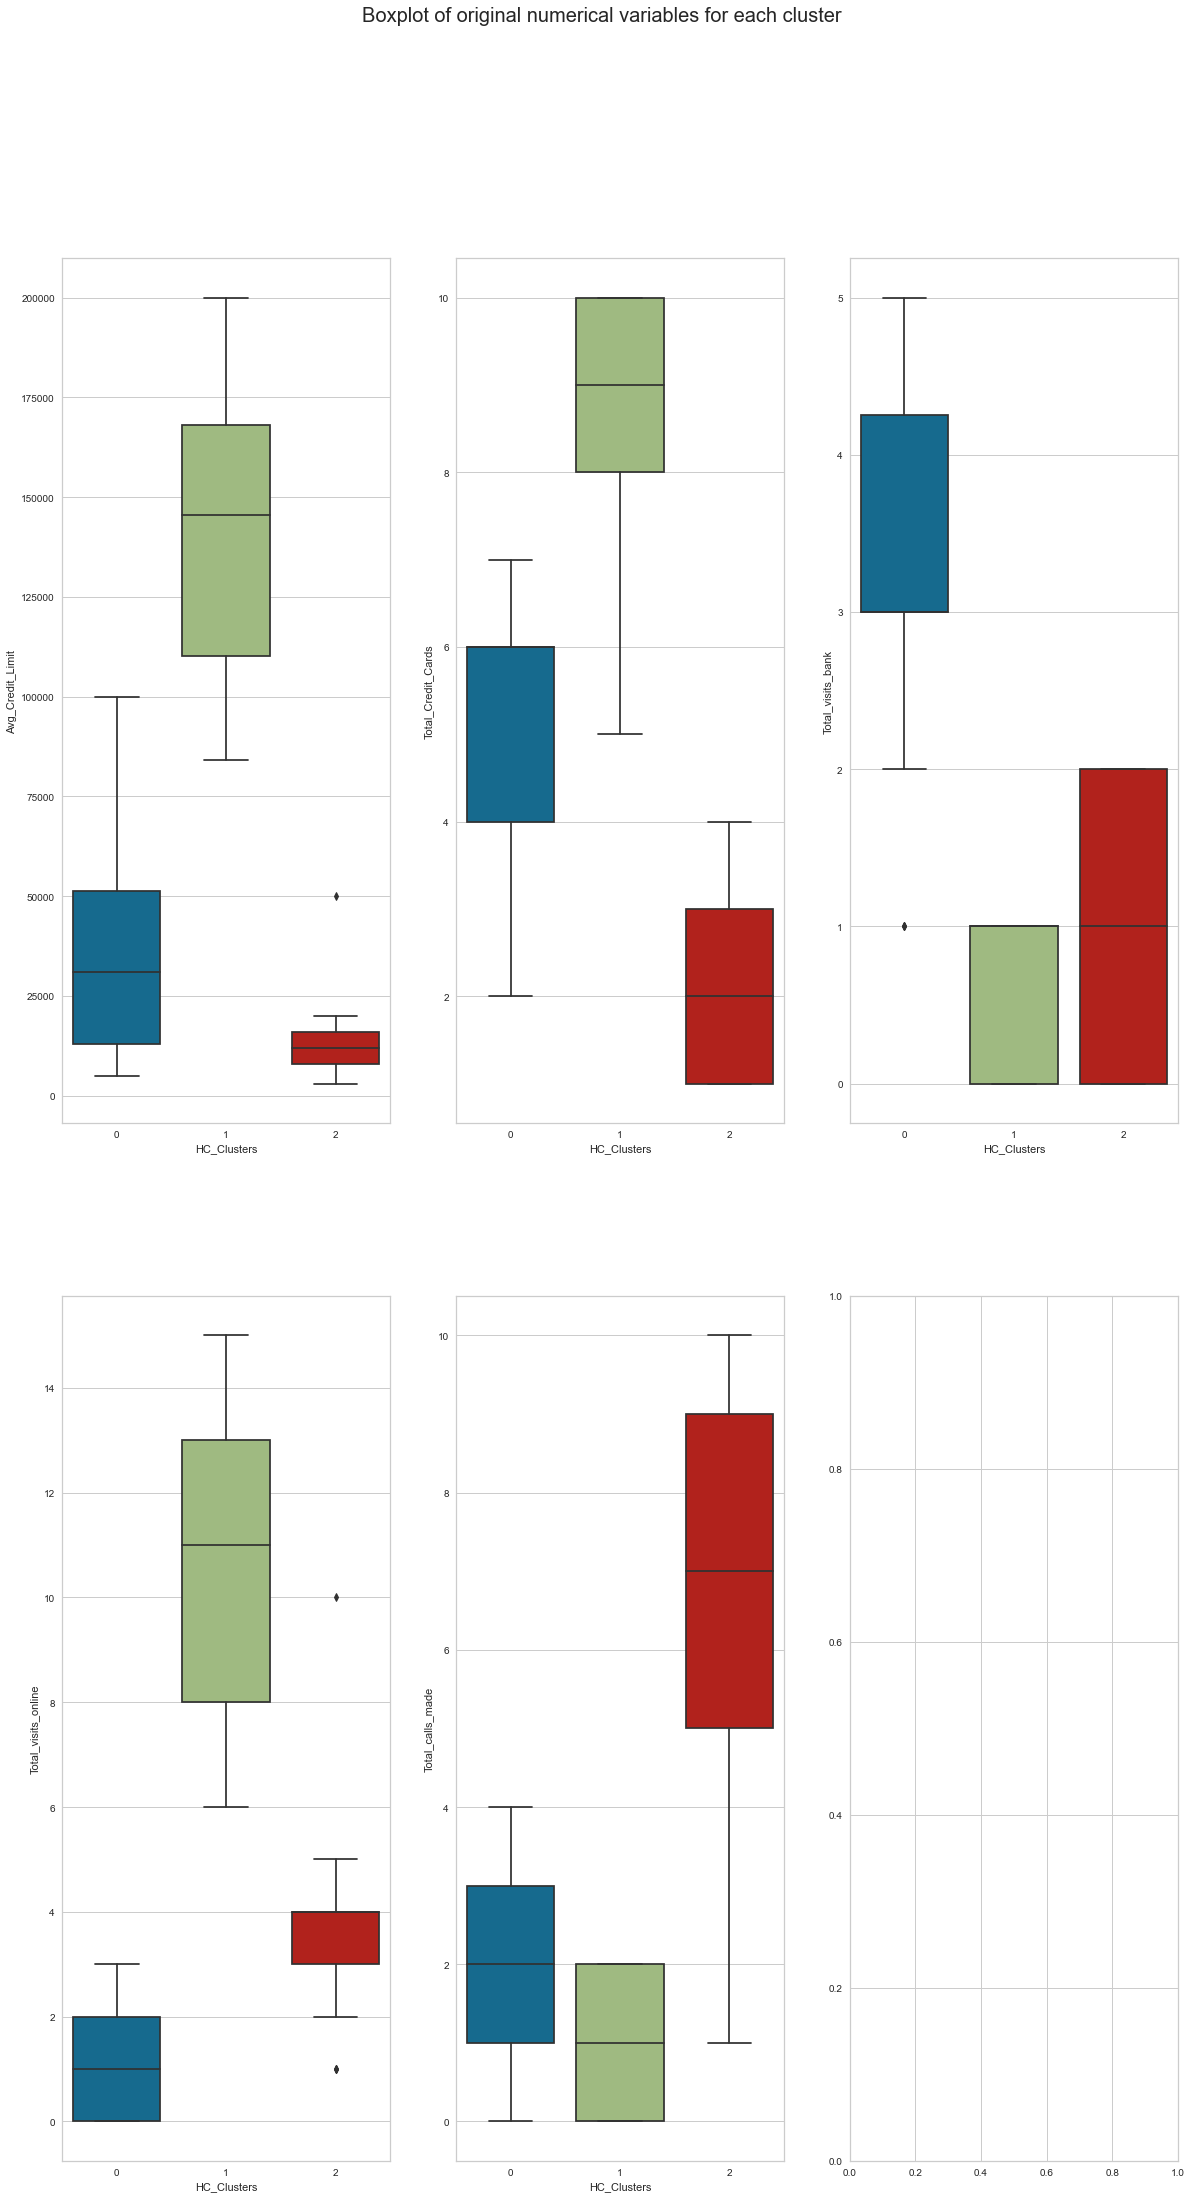

<IPython.core.display.Javascript object>

In [111]:
fig, axes = plt.subplots(2, 3, figsize=(20, 35))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(2):
    sns.boxplot(ax=axes[ii][0], y=df[cluster_cols[counter]], x=df["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][1], y=df[cluster_cols[counter]], x=df["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][2], y=df[cluster_cols[counter]], x=df["HC_Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

## Insights

- **Cluster 0**
   - There are 380 customers in this cluster.
   - The customers in this cluster have a moderate average credit limit of $33,631. 
   - Customers in this cluster have between 5-6 credit cards.
   - Customers in this cluser visit the bank in person 3-4 times in a year.
   - Customers in this cluser visit the bank online an average of once a year.
   - Customers in this segment contact the bank by phone an average of 2 times in a year.
   
   
- **Cluster 1**
   - There are 40 customers in this cluster.
   - The customers in this cluster have a high average credit limit of $140,937. 
   - Customers in this cluster have an average of 9 credit cards.
   - Customers in this cluser visit the bank in person the least with an average of .6 times in a year.
   - Customers in this cluser visit the bank online the most with an average of 11 times in a year.
   - Customers in this segment contact the bank by phone the least with an average of 1 call a year.
   
   
- **Cluster 2**
   - There are 222 customers in this cluster.
   - The customers in this cluster have a the lowest average credit limit of $12,180. 
   - Customers in this cluster have an average of between 2-3 credit cards.
   - Customers in this cluser visit the bank in person an average of once a year.
   - Customers in this cluser visit the bank online between 3-4 times in a year.
   - Customers in this segment contact the bank by phone the most with an average of 7 calls in a year.

### K-Means vs Hierarchical Clustering

Both clustering methods produce identical clusters of customers.

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [99]:
# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

<IPython.core.display.Javascript object>

In [100]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.8444061939794701

<IPython.core.display.Javascript object>

- The first two principal components explain 84.4% of the variance in the data.

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

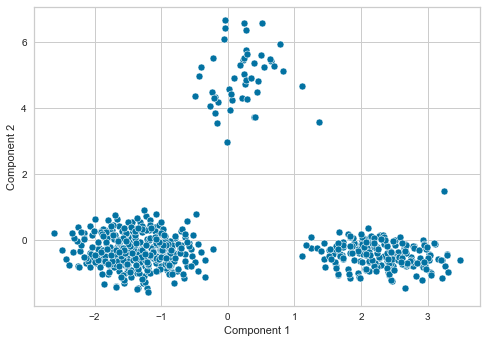

<IPython.core.display.Javascript object>

In [101]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

- We can kind of see three broad clusters.
- There a few outlier points too.

Adding colour the scatterplot by cluster labels:

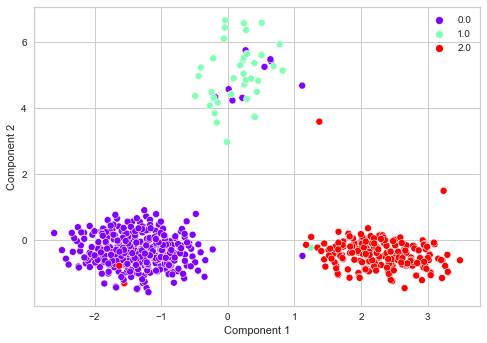

<IPython.core.display.Javascript object>

In [103]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

There are a few customers from cluster 0 grouped with cluster 1. Aside from that, these clusters are well formed.

## Recommendations Based on Hierarchical Cluster Profiling 

**Cluster 0** customers are good customers to educate about the services available online so they don't need to go to the physical bank as much.

**Cluster 1** customers are good customers to enhance online service offerings and potentially introduce "VIP" like concierage services based on cluster profiling done above. There is opportunity in this customer segment to offer attractive balance transfer offers or to offer great credit terms for additional products like debt consolidation, personal loans or even mortgages or auto financing. The bank could even sell this list of clients to companies looking for well-qualified customers for luxury goods.

**Cluster 2** customers are good customers to educate about the services available online as well so they don't need to go to call the bank as much. This cluster of customers would be good to develop a chatbot for online to reduce the number of calls. In addition, cluster 2 customers would be good customers to up sell and introduce more products to, as they have the fewest number of credit cards and are the largest customer cluster aside from the high net-worth customers in cluster 1.